# Case study on Unsupervised Learning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
wine_data = pd.read_csv(r'C:\Users\91974\Desktop\Wine.csv')
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
%whos

Variable    Type         Data/Info
----------------------------------
np          module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd          module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt         module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns         module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
warnings    module       <module 'warnings' from '<...>onda3\\lib\\warnings.py'>
wine_data   DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]


In [6]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [9]:
wine_data.shape

(178, 13)

# Checking correlation

In [10]:
correlation=wine_data.corr()
correlation

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


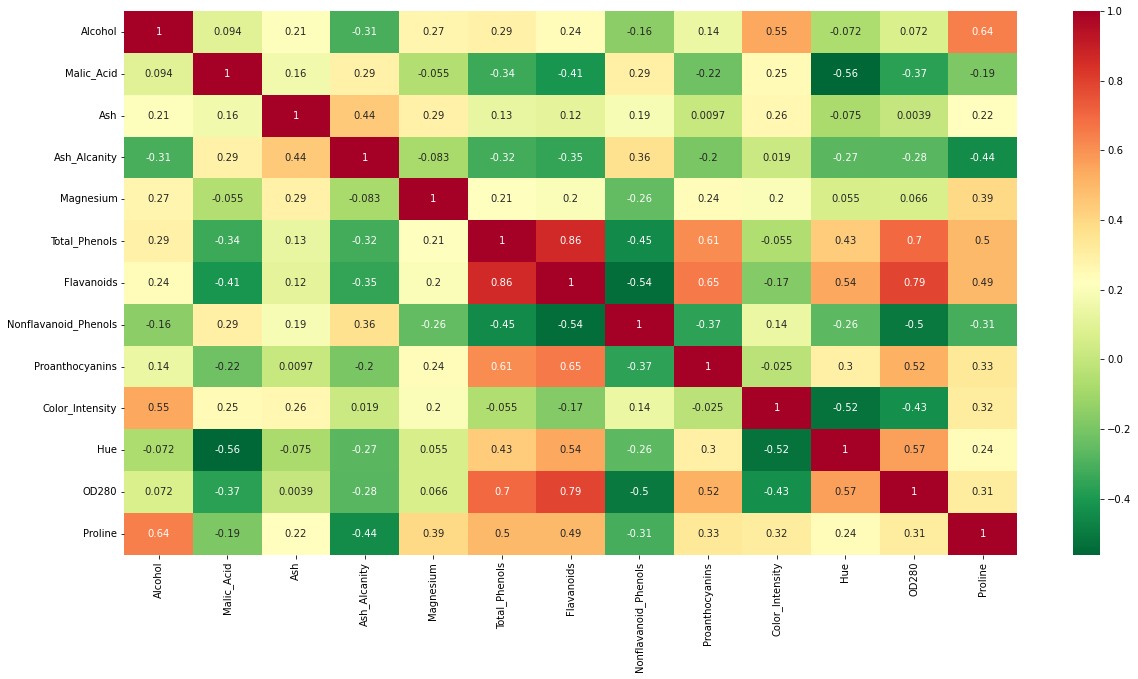

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, xticklabels= True, yticklabels =True,cmap = 'RdYlGn_r')
plt.show()

# PCA

# Normalize data

We are going to normalize data by removing the mean and scaling to unit variance using preprocessing.StandardScaler and the table below show the general description statistics of normalized data.

In [13]:
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(wine_data), columns=wine_data.columns, index = wine_data.index)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=True,with_std=True)
scaler.fit(wine_data)
scaled_data=scaler.transform(wine_data)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA()
pca.fit(scaled_data)

PCA()

In [17]:
pip install pca

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=614f5296b446dedca37adfdfa7ff7313f0673f72a9cf04c7d9092fcc5a1ec6dd
  Stored in directory: c:\users\91974\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=6f808878fa3fd98919f3f5b7e8bd49dccecb315074a94e11f274008f0b1e1b50
  Stored in directory: c:\users\91974\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built sklearn wget
Note: you may need to restart the kernel to use updated packages.


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


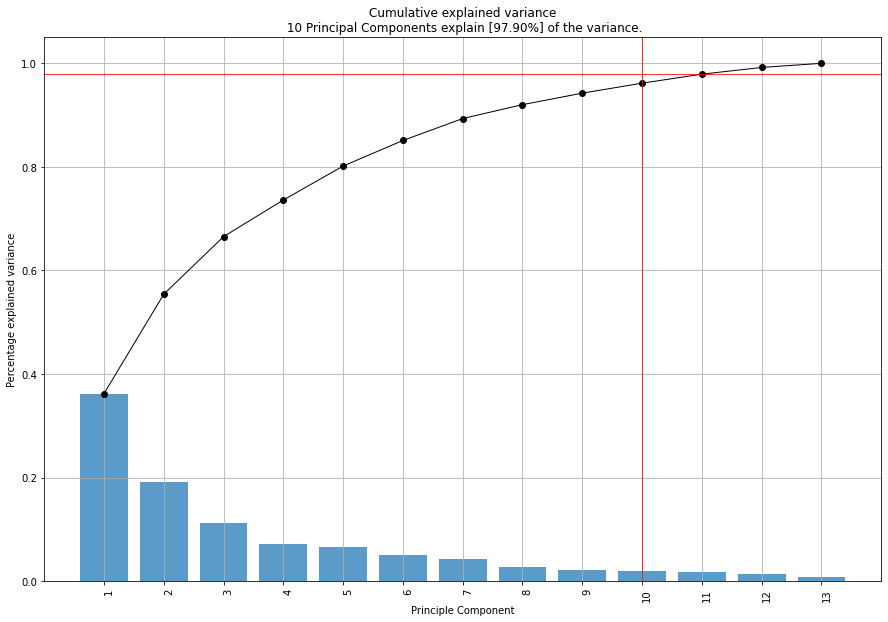

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

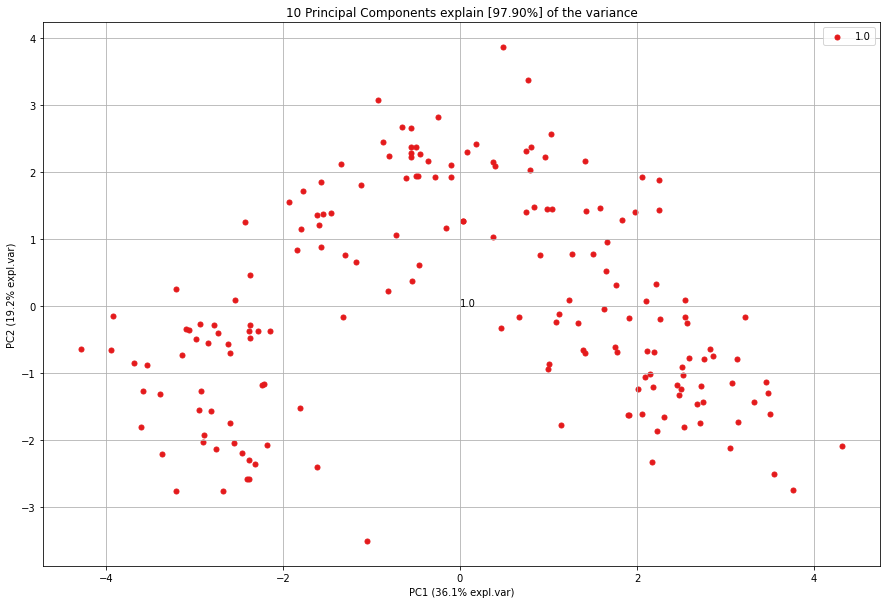

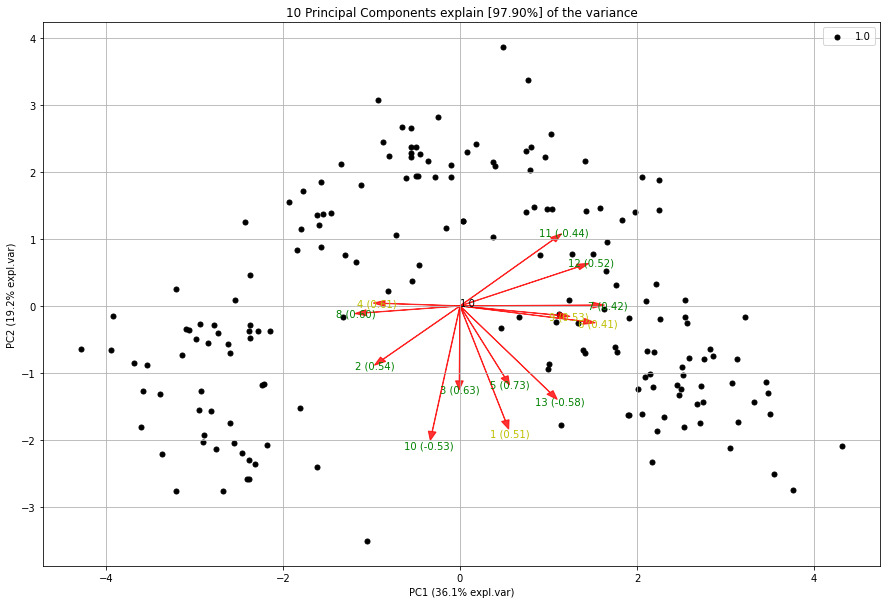

In [18]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Fit transform
results = model.fit_transform(scaled_data)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=13,cmap='copper')

In [19]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)

In [20]:
pcadf=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pcadf.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [21]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


# K means clustering

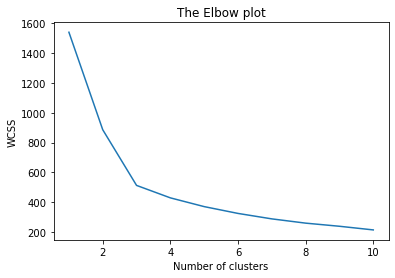

In [22]:
from sklearn.cluster import KMeans
# elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(pcadf)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

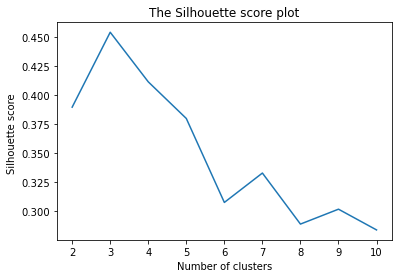

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
score=[]
for i in range(2,11):
  km=KMeans(i)
  km.fit_predict(pcadf)
  score.append(silhouette_score(pcadf, km.labels_, metric='euclidean'))
number_clusters = range(2,11)
plt.plot(number_clusters,score)
plt.title('The Silhouette score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(pcadf)

In [25]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
kmeans.inertia_

513.0564645910762

In [27]:
kmeans.n_iter_

6

In [29]:
kmeans.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [30]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 62, 2: 65, 0: 51})

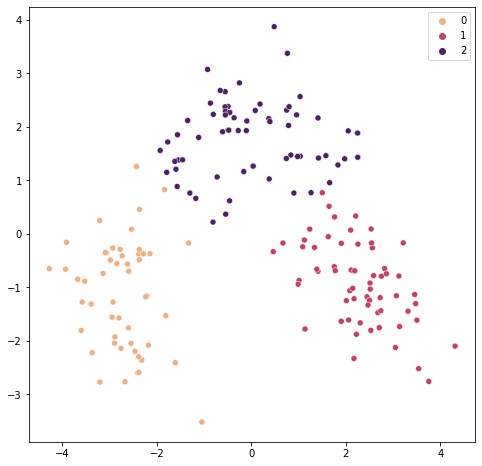

In [31]:
plt.figure(figsize=(8,8))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=kmeans.labels_,palette='flare')
plt.show()

# Hierarchical Clustering

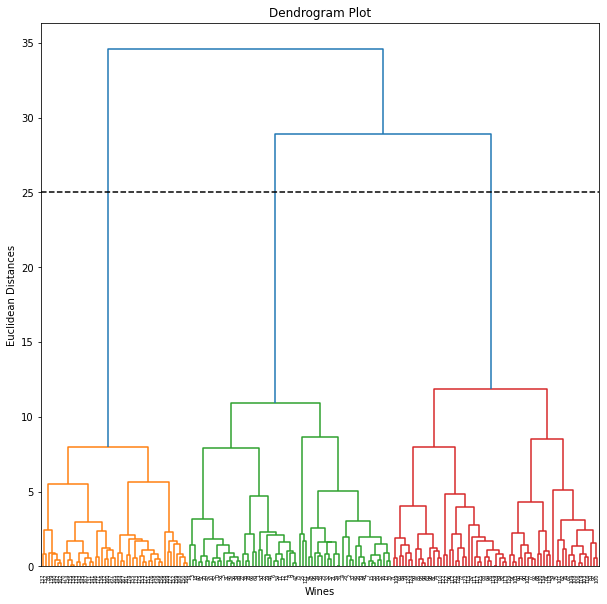

In [32]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,10)) 
dendro = shc.dendrogram(shc.linkage(pcadf, method="ward")) 
plt.axhline(y=25,color="black",linestyle="--") 
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Wines")  
plt.show()


In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
linkage=['complete', 'average', 'single']
affinity=["euclidean","manhattan","cosine"]
s_scores=[]
max_score=-1
for i in affinity:
  for j in linkage:
    agg=AgglomerativeClustering(n_clusters=3, affinity=i, linkage=j,).fit(pcadf)
    s_scores.append(silhouette_score(pcadf, agg.labels_))
    if s_scores[-1]>max_score:
      aff=i
      link=j
print(aff,link)

cosine single


In [35]:
cos_single=silhouette_score(pcadf,AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="single").fit(pcadf).labels_ )
cos_single

0.009694079148702081

In [36]:
euclidean_ward=silhouette_score(pcadf,AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward").fit(pcadf).labels_ )
euclidean_ward

0.4459492198062967

In [37]:
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward',)
agg.fit(pcadf)

AgglomerativeClustering(n_clusters=3)

In [38]:
agg.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [39]:
from collections import Counter
Counter(agg.labels_)

Counter({2: 65, 0: 66, 1: 47})

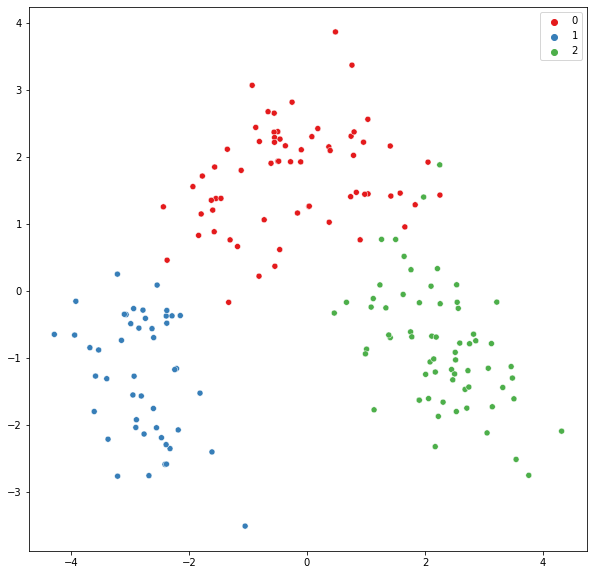

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=agg.labels_,palette='Set1')
plt.show()

# Model Comparison

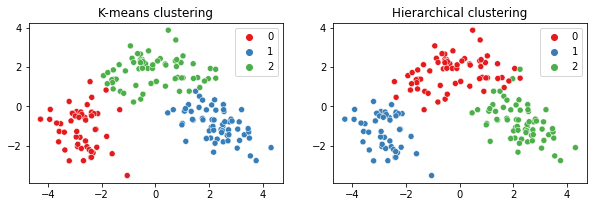

In [41]:
ax=[]
names=["K-means clustering","Hierarchical clustering"]
comp=[kmeans.labels_,agg.labels_]
fig=plt.figure(figsize=(10,10))
for i in range(0,2):
  ax.append(fig.add_subplot(3,2,(i+1)))
  sns.scatterplot(x_pca[:,0],x_pca[:,1],hue=comp[i],ax=ax[i],palette="Set1")
  ax[i].set_title(names[i])
plt.show()

Not much difference is visible in the different clustering algorithms

Evaluating the clustering algorithms

The Davies–Bouldin index is a metric for evaluating clustering algorithms where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. Lower the DB index value, better is the clustering

In [43]:
from sklearn.metrics import davies_bouldin_score

In [44]:
row_names=['Algorithm','Silhouette score','DB index']
alg=["K-Means","Hierarchical"]
comp=[kmeans.labels_,agg.labels_]
d={}
for i in range(0,2):
    d[i]=[alg[i],silhouette_score(pcadf,comp[i]),davies_bouldin_score(pcadf,comp[i])]
d
table=pd.DataFrame(d,index=row_names)
table

,0,1
Algorithm,K-Means,Hierarchical
Silhouette score,0.4538,0.445949
DB index,0.838856,0.851522
